<div style = "text-align: left"><font size = 8 color = "#B22222" face = "verdana"><b>Tesco Online Platforms</b></font></div>
12:59
<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>Tesco Customers Prediction Experimentation</b></font></div>
<div style = "text-align: leftt"><font><i>By 'Bishop</i></font></div>
<div style = "text-align: leftt"><font>25th February 2023</font></div>

DATA INGESTION

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import seaborn as sns ; sns.set()

In [37]:
pwd

'c:\\Users\\WINNER\\Documents\\Redzone workspace\\tesco_onlineplatform_prediction'

In [38]:
FILE_NAME = "tesco.csv"
DATA_FOLDER = "data"

In [39]:
main_path = os.getcwd()
main_path

'c:\\Users\\WINNER\\Documents\\Redzone workspace\\tesco_onlineplatform_prediction'

In [40]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)

In [41]:
file_path

'c:\\Users\\WINNER\\Documents\\Redzone workspace\\tesco_onlineplatform_prediction\\data\\tesco.csv'

In [42]:
%%time

tesco_data = pd.read_csv(file_path)

Wall time: 47.8 ms


In [43]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
tesco_data.shape

(7043, 21)

In [45]:
tesco_data.shape

(7043, 21)

DATA INSPECTION

In [46]:
tesco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


MODEL BUILDING

EXPLORATIVE DATA ANALYSIS (EDA)

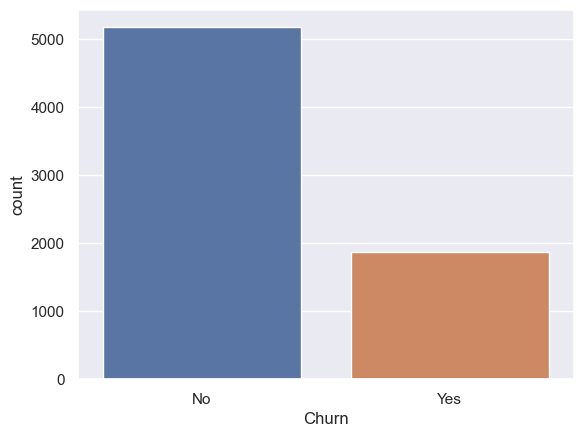

In [47]:
sns.countplot(x='Churn',data=tesco_data)
plt.show()

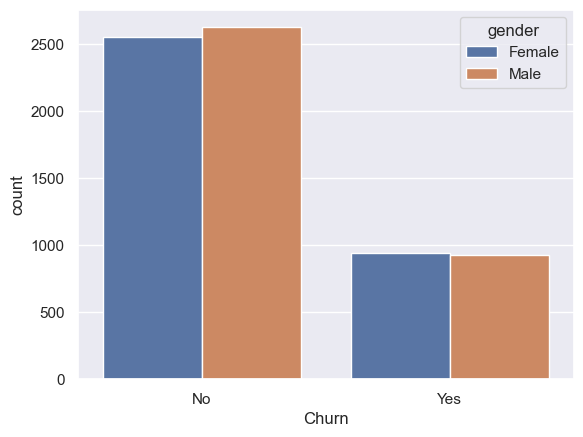

In [48]:
# count plot churn and gender
sns.countplot(x='Churn',hue='gender',data=tesco_data)
plt.show()

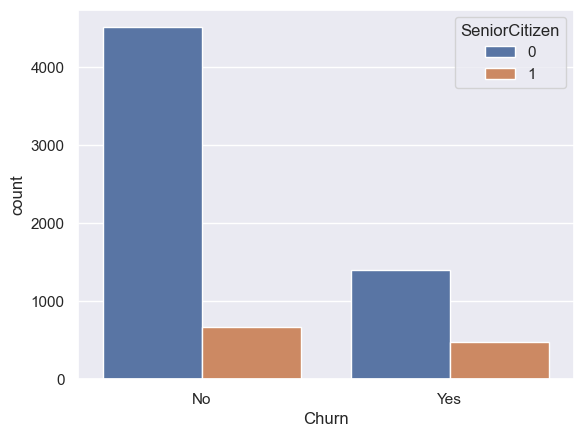

In [49]:
# count plot churn and SeniorCitizen
sns.countplot(x='Churn',hue='SeniorCitizen',data=tesco_data)
plt.show()

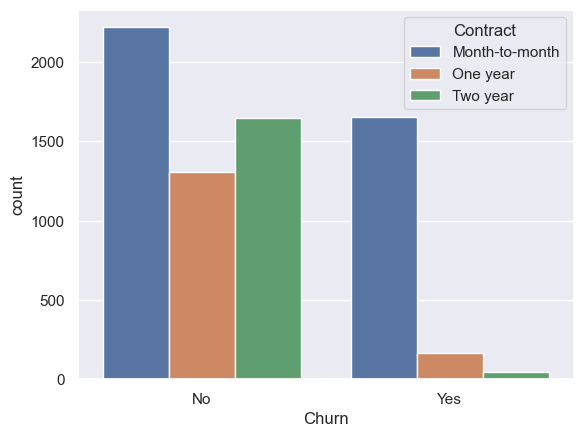

In [50]:
# count plot churn and Contract
sns.countplot(x='Churn',hue='Contract',data=tesco_data)
plt.show()

In [51]:
tesco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Model Building with AUTOGLUON

In [23]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset,TabularPredictor

In [ ]:
#y = mX + c

In [24]:
train_data, test_data = train_test_split(tesco_data, test_size=0.33, random_state=42)

In [25]:
train_data.shape, test_data.shape

((4718, 21), (2325, 21))

MODEL TRAINING 

In [26]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
298,2985-JUUBZ,Male,0,Yes,Yes,40,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.55,3015.75,No
3318,5016-ETTFF,Male,0,No,No,10,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,29.50,255.25,Yes
5586,1998-VHJHK,Female,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.15,501.35,No
6654,1925-TIBLE,Female,0,Yes,No,7,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.50,582.5,Yes
5362,0485-ZBSLN,Male,0,Yes,Yes,65,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1715.1,No


In [27]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [28]:
tesco_data.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
tesco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
label = 'Churn'
print("Summary of class variable: \n", train_data[label].describe())

Summary of class variable: 
 count     4718
unique       2
top         No
freq      3477
Name: Churn, dtype: object


In [31]:
%%time

save_path = 'models'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data) # , presets="best_quality")

Beginning AutoGluon training ...
AutoGluon will save models to "models\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    4718
Train Data Columns: 20
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Yes) vs negative (No) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preproce

CPU times: total: 1min 58s
Wall time: 40.9 s


In [32]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.806,0.008002,1.350675,0.000000,0.686185,2,True,14
1,LightGBMXT,0.806,0.008002,0.664490,0.008002,0.664490,1,True,3
2,CatBoost,0.804,0.015679,12.478550,0.015679,12.478550,1,True,7
3,NeuralNetTorch,0.796,0.016027,8.714901,0.016027,8.714901,1,True,12
4,LightGBM,0.796,0.016669,0.573474,0.016669,0.573474,1,True,4
5,XGBoost,0.794,0.019681,1.238246,0.019681,1.238246,1,True,11
6,NeuralNetFastAI,0.790,0.034058,7.408320,0.034058,7.408320,1,True,10
7,LightGBMLarge,0.788,0.000000,1.133576,0.000000,1.133576,1,True,13
8,RandomForestGini,0.784,0.069197,1.149034,0.069197,1.149034,1,True,5
9,ExtraTreesGini,0.778,0.144838,0.977138,0.144838,0.977138,1,True,8


MODEL EVALUATION

In [33]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [34]:
y_test = test_data[label]  # values to predict

In [35]:
y_test[0:5]

185     Yes
2715     No
3825     No
1807    Yes
132      No
Name: Churn, dtype: object

In [36]:
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating
test_data_nolab.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1


In [37]:
save_path

'models'

In [38]:
predictor

In [39]:
save_model_predictor = TabularPredictor.load(save_path)

In [40]:
save_model_predictor

TARGET PREDICTION

In [41]:
y_pred = save_model_predictor.predict(test_data_nolab)

In [42]:
y_pred[0:5]

185     Yes
2715     No
3825     No
1807    Yes
132      No
Name: Churn, dtype: object

In [43]:
# print("Predictions:  \n", y_pred)
perf = save_model_predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.7987096774193548
Evaluations on test data:
{
    "accuracy": 0.7987096774193548,
    "balanced_accuracy": 0.6785456913474134,
    "mcc": 0.4363255294295534,
    "f1": 0.528225806451613,
    "precision": 0.7197802197802198,
    "recall": 0.4171974522292994
}


In [44]:
save_model_predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.807312,0.796,0.061277,0.016027,8.714901,0.061277,0.016027,8.714901,1,True,12
1,NeuralNetFastAI,0.805591,0.790,0.089367,0.034058,7.408320,0.089367,0.034058,7.408320,1,True,10
2,LightGBM,0.803011,0.796,0.015906,0.016669,0.573474,0.015906,0.016669,0.573474,1,True,4
3,LightGBMXT,0.798710,0.806,0.016720,0.008002,0.664490,0.016720,0.008002,0.664490,1,True,3
4,WeightedEnsemble_L2,0.798710,0.806,0.020643,0.008002,1.350675,0.003923,0.000000,0.686185,2,True,14
5,CatBoost,0.797849,0.804,0.024006,0.015679,12.478550,0.024006,0.015679,12.478550,1,True,7
6,XGBoost,0.797419,0.794,0.047451,0.019681,1.238246,0.047451,0.019681,1.238246,1,True,11
7,RandomForestEntr,0.791828,0.772,0.303480,0.087864,0.917706,0.303480,0.087864,0.917706,1,True,6
8,RandomForestGini,0.790968,0.784,0.313878,0.069197,1.149034,0.313878,0.069197,1.149034,1,True,5
9,ExtraTreesGini,0.788387,0.778,0.390791,0.144838,0.977138,0.390791,0.144838,0.977138,1,True,8


FEATURES ENGINEERING

In [45]:
%%time

save_model_predictor.feature_importance(train_data)

These features in provided data are not utilized by the predictor and will be ignored: ['customerID']
Computing feature importance via permutation shuffling for 19 features using 4718 rows with 5 shuffle sets...
	6.38s	= Expected runtime (1.28s per shuffle set)
	2.59s	= Actual runtime (Completed 5 of 5 shuffle sets)


CPU times: total: 5.97 s
Wall time: 2.62 s


,importance,stddev,p_value,n,p99_high,p99_low
tenure,0.045867,0.003052,0.000002,5,0.052150,0.039583
Contract,0.032217,0.003553,0.000017,5,0.039533,0.024901
InternetService,0.031963,0.003784,0.000023,5,0.039754,0.024172
OnlineSecurity,0.020432,0.002484,0.000026,5,0.025546,0.015319
PaperlessBilling,0.009962,0.001689,0.000095,5,0.013440,0.006484
PaymentMethod,0.007715,0.002349,0.000915,5,0.012551,0.002879
TechSupport,0.006528,0.001582,0.000383,5,0.009785,0.003271
MultipleLines,0.004578,0.000697,0.000062,5,0.006012,0.003144
PhoneService,0.003264,0.000573,0.000109,5,0.004443,0.002085
StreamingMovies,0.002162,0.001203,0.007936,5,0.004638,-0.000315


In [46]:
%%time

save_model_predictor.feature_importance(test_data)

These features in provided data are not utilized by the predictor and will be ignored: ['customerID']
Computing feature importance via permutation shuffling for 19 features using 2325 rows with 5 shuffle sets...
	6.05s	= Expected runtime (1.21s per shuffle set)
	1.53s	= Actual runtime (Completed 5 of 5 shuffle sets)


CPU times: total: 4.17 s
Wall time: 1.54 s


,importance,stddev,p_value,n,p99_high,p99_low
tenure,0.043097,0.007833,0.000125,5,0.059226,0.026968
InternetService,0.028301,0.002892,0.000013,5,0.034255,0.022347
Contract,0.024344,0.005131,0.000223,5,0.034908,0.013780
OnlineSecurity,0.016946,0.002142,0.000030,5,0.021356,0.012536
PaperlessBilling,0.006710,0.001962,0.000785,5,0.010749,0.002671
PhoneService,0.004559,0.000990,0.000251,5,0.006598,0.002520
TechSupport,0.003613,0.001938,0.007022,5,0.007603,-0.000377
MultipleLines,0.003613,0.001736,0.004822,5,0.007188,0.000037
OnlineBackup,0.002753,0.001276,0.004249,5,0.005380,0.000126
StreamingMovies,0.002581,0.000805,0.001001,5,0.004237,0.000924


JOINING EVERYTHING TOGETHER

In [47]:
test_data["predicted_Churn"] = y_pred

In [56]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predicted_Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No,No


Using input for prediction - tbc